### Introduction to feature selection 
- what is feture selection?
    - Process of identifying and retaining the most relevent features (input variables) in a dataset while descardingf irrelevent or reduction ones 
- Why is feature selection important /
    - improves model performance 
    - Reduce overfitting 
    - Enchances interpretability 
    - increases computational efficiency 
- When to use Features selection 
    - High dimensional data 
    - correlated features 
    -reducing complexity 
---
### Techniques for feature selection
- filter methods 
    - evaluate the releveance of features by analyzing their statistical properties in relation to the target variables 
    - example: correlation(which measures the linear relationship b/w features and target eg pearson correlation coefficient) | mutual Information ( it measures the dependency between features and the target capturing non linear relationship)
    - when to use: quick evaluation of features before training a model 
- Wrapper methods 
    - iteratively selects features by training and evaluating a model 
    - examples forward selection( which starts with a no features an adds them one by one ) | backward elimination (which starts with all the features and removes them one by one )
    - when to use : useful when features interaction are important but computationally expensive 
- Embedded methods 
    - perform feature selection as part of the model training process 
    - examples : lasso regression(it is penalizes the large coefficient, efficient , shrinking some of them to zero ) | tree based model ( it uses the feature importance matrix to rank features )
    - when to use : effective when training tree bases model or regularized regression 

In [1]:
import pandas as pd 
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()
df = pd.DataFrame(data.data , columns=data.feature_names) # columns= data.feature_names helps in understanding the features and get the values of each feature
df['target'] = data.target

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
import seaborn as sns  
import matplotlib.pyplot as plt 

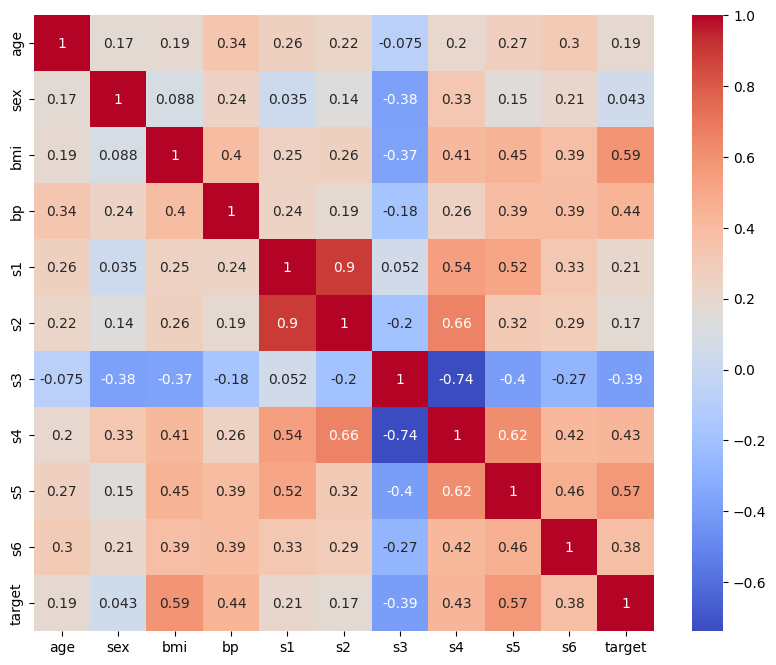

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [7]:
correlation_features = correlation_matrix['target'].sort_values(ascending=False)
print("Feature most correlation with target: \n" , correlation_features)

Feature most correlation with target: 
 target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [8]:
from sklearn.feature_selection import mutual_info_regression

In [9]:
# separate features and target 
x = df.drop(columns=['target'])
y = df['target']

mutual_info = mutual_info_regression(x,y)

#create a dataframe for better visualization
mutual_info_df = pd.DataFrame(mutual_info, index=x.columns, columns=['Mutual Information'])
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)


In [10]:
mutual_info_df

,Mutual Information
bmi,0.172271
s5,0.147270
s6,0.110976
s4,0.095298
s1,0.064225
s3,0.063110
bp,0.063103
sex,0.040795
s2,0.013428
age,0.000000


In [11]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np  
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x,y)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
Feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'feature':x.columns, 'importance':Feature_importance  })
importance_df = importance_df.sort_values(by='importance', ascending=False)

In [13]:
importance_df

,feature,importance
8,s5,0.315629
2,bmi,0.276249
3,bp,0.087085
9,s6,0.070775
0,age,0.057496
5,s2,0.055368
6,s3,0.051191
4,s1,0.047251
7,s4,0.027056
1,sex,0.011901


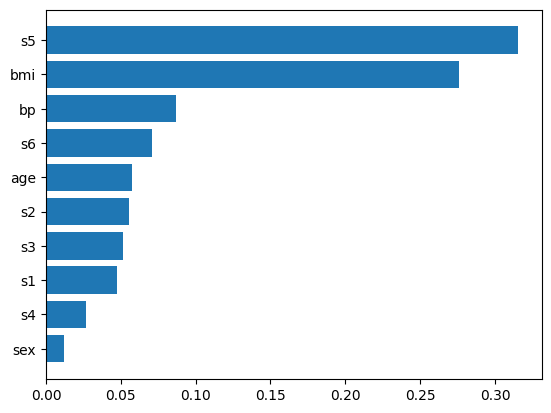

In [14]:
plt.Figure(figsize=(10,8))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.gca().invert_yaxis()